# U21EC019
# Arpit Gandhi

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras.layers import BatchNormalization
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [46]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [47]:
path = r"Z:\ml\DL_lab\sports_dataset\sports.csv"  
sports_data = pd.read_csv(path)
print(sports_data.head())

   class id                 filepaths      labels data set
0         0  train/air hockey/001.jpg  air hockey    train
1         0  train/air hockey/002.jpg  air hockey    train
2         0  train/air hockey/003.jpg  air hockey    train
3         0  train/air hockey/004.jpg  air hockey    train
4         0  train/air hockey/005.jpg  air hockey    train


In [48]:
train_data = sports_data[sports_data['data set'] == 'train']
valid_data = sports_data[sports_data['data set'] == 'valid']
test_data = sports_data[sports_data['data set'] == 'test']
final_data = pd.concat([train_data, valid_data, test_data], ignore_index=True)
train_data, test_data = train_test_split(final_data, test_size=0.2,
                        stratify=final_data['class id'])

In [49]:
root_dir = r'Z:\ml\DL_lab\sports_dataset'  

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_dataframe(
train_data, directory=root_dir,
x_col='filepaths', y_col='labels',
shuffle=True, class_mode='categorical',
target_size=(64, 64),batch_size=32)

test_generator = datagen.flow_from_dataframe(
test_data, directory=root_dir,
x_col='filepaths', y_col='labels',
class_mode='categorical', target_size=(64, 64),
batch_size=32, shuffle=False
 )

Found 11594 validated image filenames belonging to 100 classes.
Found 2898 validated image filenames belonging to 100 classes.


Z:\ml\ml\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


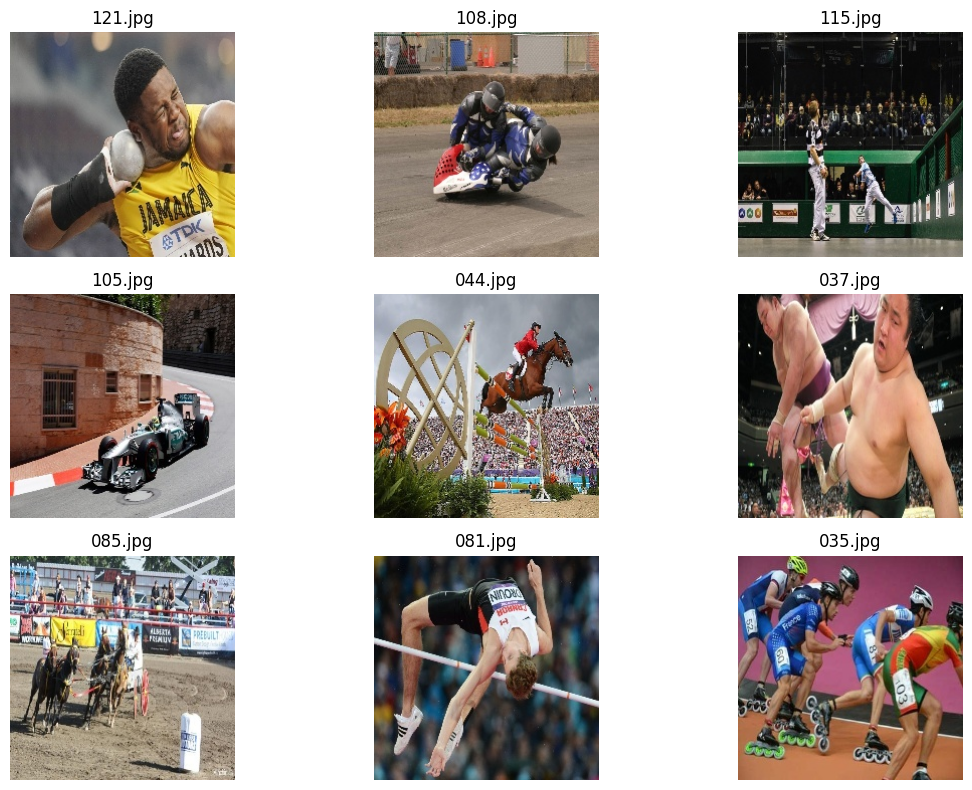

In [50]:
def visualize(data, root_dir, filepath_column='filepaths', n_images=6, n_cols=3, figsize=(12, 8)):
    sample_filepaths = data[filepath_column].sample(n_images, random_state=13)
    sample_filepaths = [os.path.join(root_dir, filepath.replace("\\", "/")) for filepath in sample_filepaths]
    
    n_rows = (n_images + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, filepath in enumerate(sample_filepaths):
        if os.path.exists(filepath):
            img = Image.open(filepath)
            axes[i].imshow(img)
            axes[i].set_title(os.path.basename(filepath))
        else:
            axes[i].imshow(Image.new('RGB', (64, 64), color='gray'))
            axes[i].set_title("Image not found")
        axes[i].axis('off')
    
    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
# Visualize 6 random images from the training data
visualize(train_data, root_dir=root_dir, n_images= 9)


In [51]:
len(train_generator.class_indices)

100

In [52]:
 model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
loss='categorical_crossentropy', metrics=['accuracy'])
              
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
363/363 [==============================] - 13s 34ms/step - loss: 4.2659 - accuracy: 0.0831 - val_loss: 5.1693 - val_accuracy: 0.0228
Epoch 2/10
363/363 [==============================] - 12s 33ms/step - loss: 3.1919 - accuracy: 0.2422 - val_loss: 3.3033 - val_accuracy: 0.2195
Epoch 3/10
363/363 [==============================] - 12s 33ms/step - loss: 2.5101 - accuracy: 0.3851 - val_loss: 3.0091 - val_accuracy: 0.2595
Epoch 4/10
363/363 [==============================] - 12s 33ms/step - loss: 1.9549 - accuracy: 0.5104 - val_loss: 2.9375 - val_accuracy: 0.2792
Epoch 5/10
363/363 [==============================] - 12s 33ms/step - loss: 1.4267 - accuracy: 0.6531 - val_loss: 2.9103 - val_accuracy: 0.2888
Epoch 6/10
363/363 [==============================] - 13s 35ms/step - loss: 0.9657 - accuracy: 0.7839 - val_loss: 2.9732 - val_accuracy: 0.2950
Epoch 7/10
363/363 [==============================] - 13s 35ms/step - loss: 0.6026 - accuracy: 0.8886 - val_loss: 3.0809 - val_accuracy:

In [53]:
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=-1)  
y_true = test_generator.classes

91/91 [==============================] - 3s 26ms/step


In [54]:
labels = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp

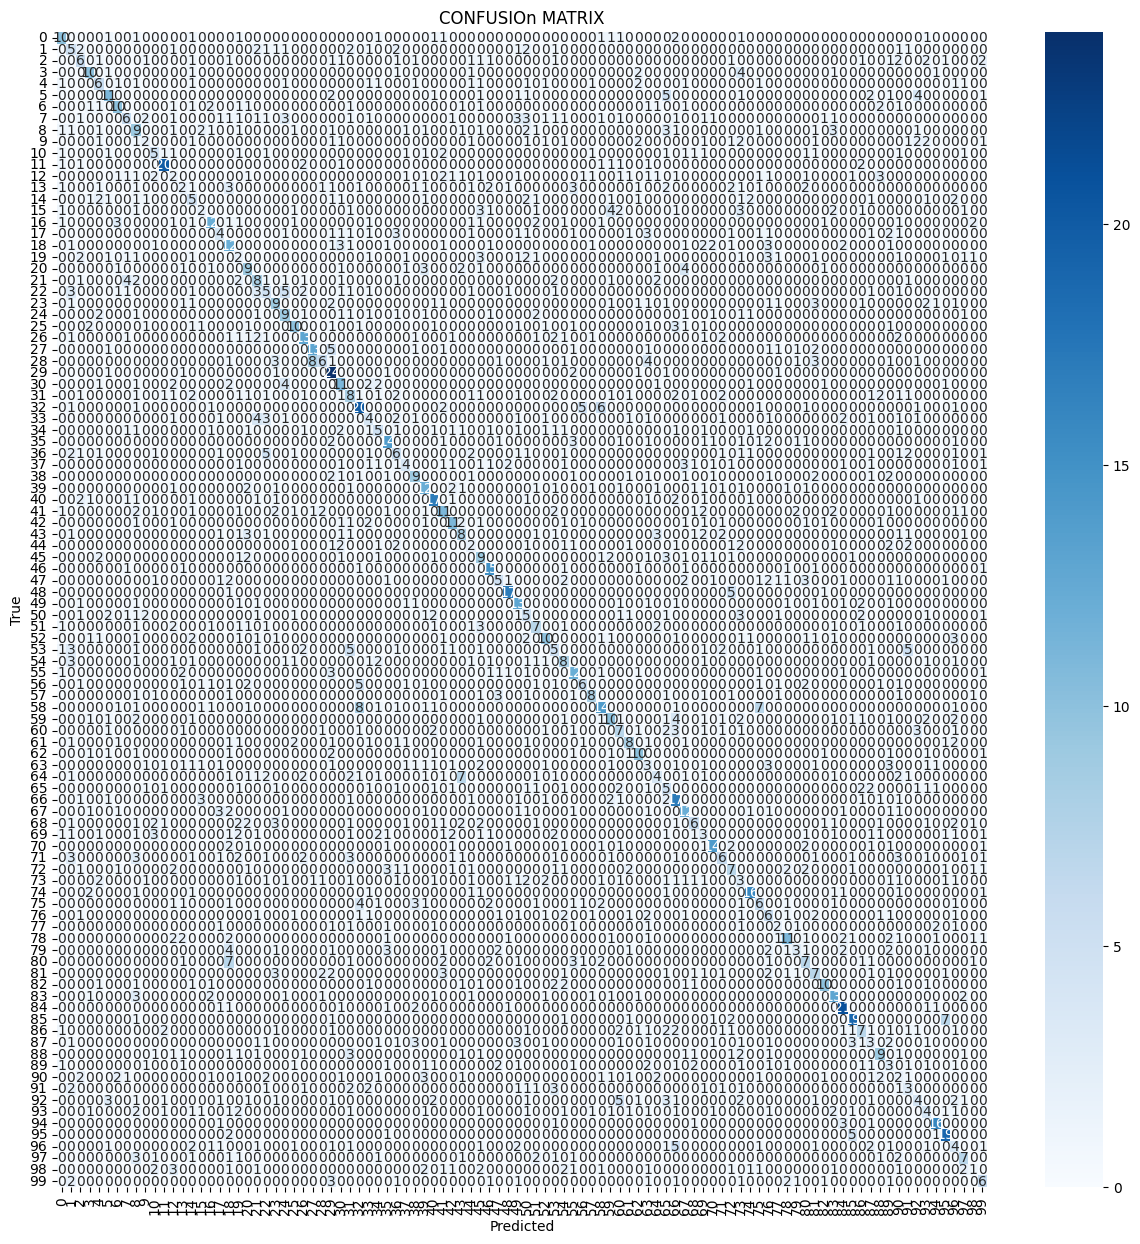

In [55]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('CONFUSIOn MATRIX')
    plt.show()

plot_confusion_matrix(y_true,y_pred,labels)

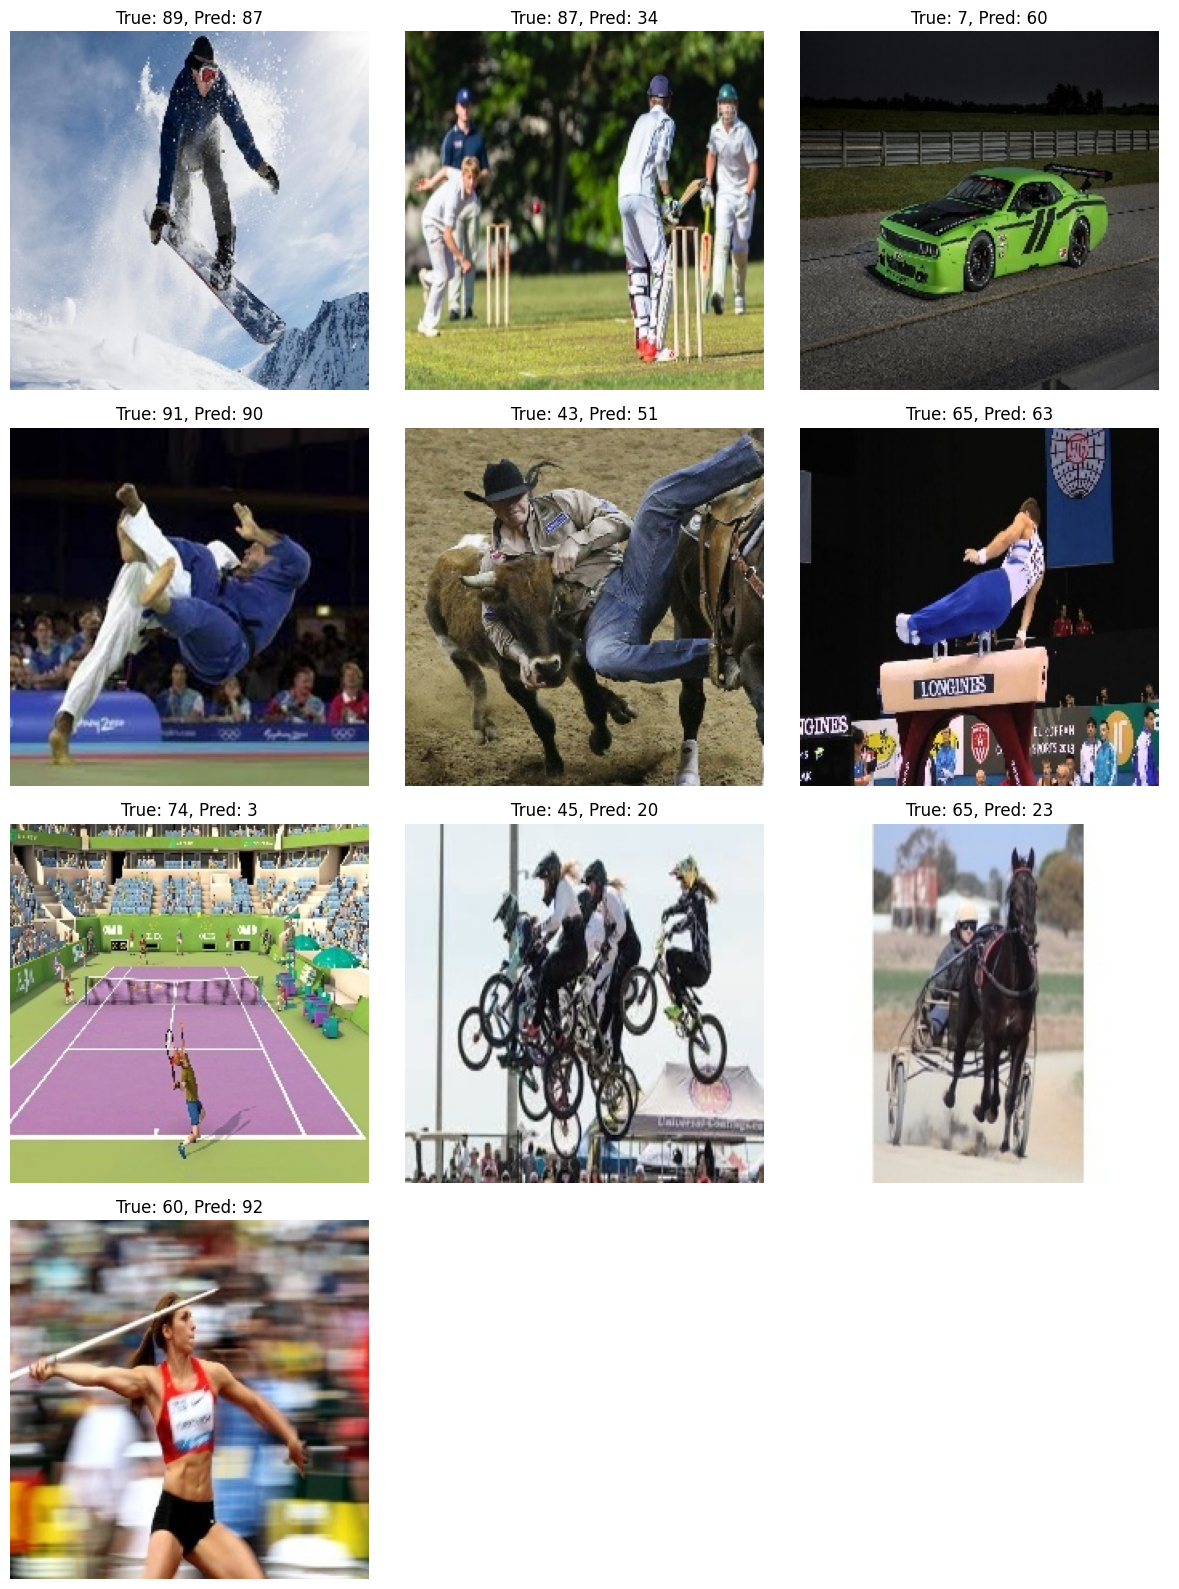

In [56]:
def fix_path(filepath):
    fixed_path = filepath.replace("train/train", "train")
    return fixed_path

def visualize_misclassified_images(data, y_true, y_pred, root_dir, 
                                   filepath_column='filepaths', n_images=12):
    misclassified_indices = np.where(y_true != y_pred)[0]
    sample_misclassified_indices = np.random.choice(misclassified_indices, 
                min(n_images, len(misclassified_indices)), replace=False)
    
    n_cols = 3
    n_rows = (len(sample_misclassified_indices) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for i, idx in enumerate(sample_misclassified_indices):
        filepath = data.iloc[idx][filepath_column]
        filepath1 = filepath.replace("\\", "/")
        filepath1 = fix_path(filepath1)
        full_filepath = os.path.join(root_dir, filepath1)  
        img = Image.open(full_filepath) 
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        axes[i].imshow(img)
        axes[i].set_title(f"True: {true_label}, Pred: {pred_label}")
        axes[i].axis('off')

    # Hide any remaining empty axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


visualize_misclassified_images(data=train_data,y_true=y_true,y_pred=y_pred,root_dir=root_dir, n_images=10)